In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("placement.csv")

In [4]:
df.sample(5)

,cgpa,package
21,6.85,2.93
18,6.94,2.98
56,5.84,2.74
24,6.53,2.71
119,7.39,2.65


In [5]:
df.shape

(200, 2)

In [6]:
df.info

<bound method DataFrame.info of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

In [7]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [8]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [9]:
df.duplicated().sum()

0

In [10]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: xlabel='cgpa', ylabel='package'>

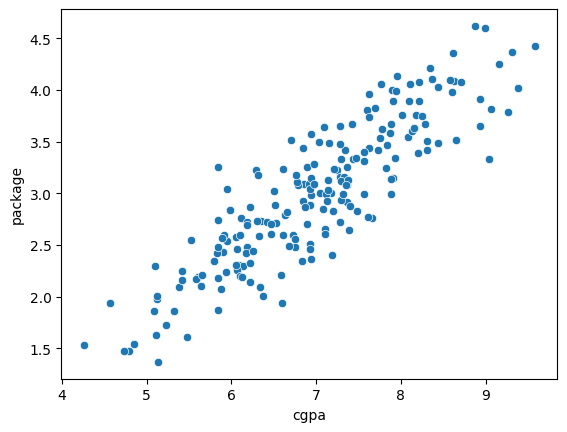

In [11]:
sns.scatterplot(x=df['cgpa'], y=df['package'])

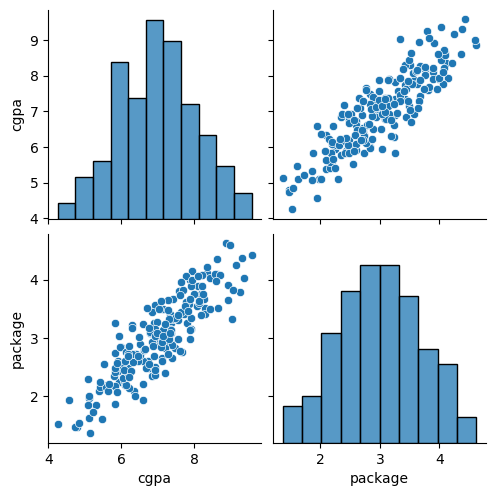

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X = df.iloc[:,0]
Y = df.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=43)

In [17]:
class MyLinearRegression:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, Y_train):
        # Using OLS
        X_mean = X_train.mean()
        Y_mean = Y_train.mean()
        u_sum = 0
        b_sum = 0
        for i in range(X_train.shape[0]):
            u_sum += (X_train[i] - X_mean)*(Y_train[i] - Y_mean)
            b_sum += (X_train[i] - X_mean)*(X_train[i] - X_mean)
            
        self.m = u_sum/b_sum
        self.b = Y_mean - (self.m * X_mean)

    def predict(self, X_test):
        return self.m * X_test + self.b

In [18]:
regg = MyLinearRegression()

In [28]:
regg.fit(X_train.values.reshape(150,1),Y_train.to_numpy().flatten())

In [29]:
Y_pred = regg.predict(X_test.values.reshape(50,1))

In [30]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.7561330018836421

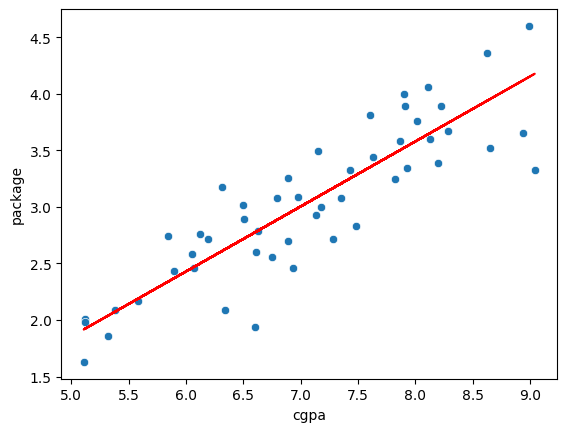

In [36]:
sns.scatterplot(x=X_test, y=Y_test)
plt.plot(X_test, Y_pred, color='red')